In [1]:
# підключаємося до диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# зчитуємо дані та перетфорюємо у датафрейм
import pandas as pd
df = pd.read_csv("gdrive/My Drive/data/TEST TASK (dataset).csv", parse_dates=[-10])

In [3]:
# розмірність та вигляд
print(df.shape)
df.head()

(1467832, 63)


total_sessions_day0  total_sessions_day1  total_sessions_day3  \
0                  1.0                  1.0                  1.0   
1                  1.0                  1.0                  1.0   
2                  1.0                  2.0                  2.0   
3                  1.0                  1.0                  1.0   
4                  1.0                  1.0                  1.0   

   total_sessions_day7  chapters_finished_day0  chapters_finished_day1  \
0                  1.0                       0                       0   
1                  1.0                       0                       0   
2                  2.0                       0                       0   
3                  1.0                       0                       0   
4                  1.0                       0                       0   

   chapters_finished_day3  chapters_finished_day7  chapters_opened_day0  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   chapters_opened_day1  ...  install_date  country_code  ad_ltv_day0  \
0                     0  ...    2021-12-03   COUNTRY_135          0.0   
1                     0  ...    2021-12-03   COUNTRY_141          0.0   
2                     0  ...    2021-12-03   COUNTRY_141          0.0   
3                     0  ...    2021-12-03   COUNTRY_141          0.0   
4                     0  ...    2021-12-03   COUNTRY_203          0.0   

   ad_ltv_day1  ad_ltv_day3  platform  target_sub_ltv_day30  \
0          0.0          0.0       ios                   0.0   
1          0.0          0.0   android                   0.0   
2          0.0          0.0   android                   0.0   
3          0.0          0.0       ios                   0.0   
4          0.0          0.0   android                   0.0   

   target_iap_ltv_day30  target_ad_ltv_day30  target_full_ltv_day30  
0                   0.0                  0.0                    0.0  
1                   0.0                  0.0                    0.0  
2                   0.0                  0.0                    0.0  
3                   0.0                  0.0                    0.0  
4                   0.0                  0.0                    0.0  

[5 rows x 63 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   total_sessions_day0         1466467 non-null  float64       
 1   total_sessions_day1         1466465 non-null  float64       
 2   total_sessions_day3         1466464 non-null  float64       
 3   total_sessions_day7         1466458 non-null  float64       
 4   chapters_finished_day0      1467832 non-null  int64         
 5   chapters_finished_day1      1467832 non-null  int64         
 6   chapters_finished_day3      1467832 non-null  int64         
 7   chapters_finished_day7      1467832 non-null  int64         
 8   chapters_opened_day0        1467832 non-null  int64         
 9   chapters_opened_day1        1467832 non-null  int64         
 10  chapters_opened_day3        1467832 non-null  int64         
 11  chapters_opened_day7    

In [5]:
# доля не нульових таргетових значень
df[df.target_full_ltv_day30 > 0].shape[0] / df.shape[0]

0.23387690144376197

In [6]:
# медіанне значення total_sessions_day7
df['total_sessions_day7'].median()

1.0

In [7]:
# кількість пропусків по колонкам
df.isnull().sum()

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64

In [8]:
# Лише 13% юзерів з total_sessions_day7 невідомим мають target_full_ltv_day30 більше 0 (в той час як загалом таких юзерів приблизно 23 %)
df[(df['total_sessions_day7'].isnull()) & (df.target_full_ltv_day30 > 0)].shape[0] / df[df['total_sessions_day7'].isnull()].shape[0]

0.13755458515283842

# Враховуючи те що написано вище та те що таких юзерів лише 1374 з загальної вибірки 1467832, в рамках цієї задачі ці юзери не будуть розглядатися (будуть видалені).
# Проте якщо виникне такий кейс, що для таких юзерів необхідно побудувати прогноз, то у відсутні поля рекомендується вставити медіанне значення (пораховане вище) рівне 1.

In [9]:
# викидаємо пропуски
df = df.dropna()

In [10]:
# нова розмірність
df.shape

(1466458, 63)

In [11]:
# перевіряємо що дійсно були викинути лише юзери з пропущеними значеннями з поля total_sessions_day7
1467832 - 1466458

1374

In [12]:
df.columns

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_opened_session9'

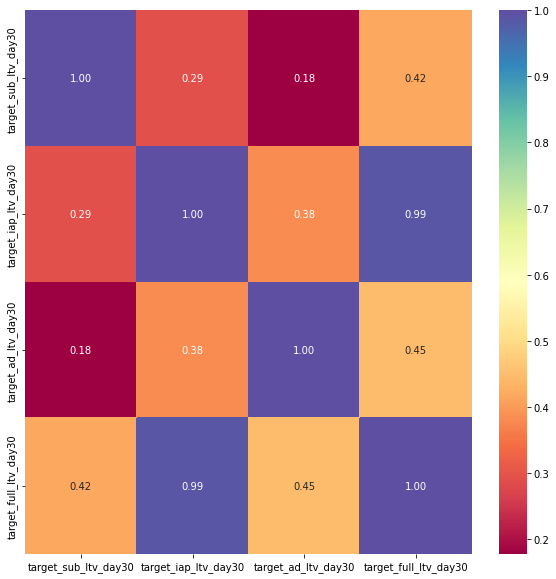

In [12]:
# Як бачимо 3 метрики, які сумарно дають основну між собою кореляюють, але не дуже сильно. Тому підійдемо до цієї задачі таким чином, що будемо прогнозувати кожну окремо - а потім порахуємо суму.
import seaborn as sns
import matplotlib.pyplot as plt
corelation_matrix = df.iloc[:, -4:].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation_matrix , xticklabels = corelation_matrix.columns 
            , yticklabels = corelation_matrix.columns , annot = True,cmap='Spectral', fmt='.2f' )

In [13]:
# розділяємо вибірку на трейн і тест (80 на 20), де мітками будуть останні 4 метрики
from sklearn.model_selection import train_test_split
import numpy as np

label = np.array(df.iloc[:, -4:])
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-4], label, test_size=0.2, random_state = 42)

In [14]:
# рахуємо загальну матрицю кореляцій
corelation_matrix_full = df.corr()
type(corelation_matrix_full)

pandas.core.frame.DataFrame

In [15]:
# дивимося які топ 27 числові фічі (це число було обрано перебором та оцінюванням якості MAE) найкраще корелюють з target_ad_ltv_day30 (викидаємо усі 4 таргет метрики)
a = corelation_matrix_full.iloc[:, -2].sort_values()[-27:]
cols_1 = a.index.values
cols = []
for i in cols_1:
  if i not in df.columns.values[-4:]:
    cols.append(i)
df_ad_train = X_train.loc[:, cols]
df_ad_test = X_test.loc[:, cols]

In [52]:
# стандартизуємо дані
from sklearn.preprocessing import StandardScaler
import numpy as np
ss_ad = StandardScaler()
f_train_ad = ss_ad.fit_transform(np.array(df_ad_train))
f_test_ad = ss_ad.fit_transform(np.array(df_ad_test))
#f2 = lb.fit_transform(df_ad['media_source'])

In [54]:
# Робимо аналогічні кроки для target_sub_ltv_day30 та target_iap_ltv_day30
a = corelation_matrix_full.iloc[:, -3].sort_values()[-27:]
cols_1 = a.index.values
cols = []
for i in cols_1:
  if i not in df.columns.values[-4:]:
    cols.append(i)
df_iap_train = X_train.loc[:, cols]
df_iap_test = X_test.loc[:, cols]
ss_iap = StandardScaler()
f_train_iap = ss_iap.fit_transform(np.array(df_iap_train))
f_test_iap = ss_iap.fit_transform(np.array(df_iap_test))

a = corelation_matrix_full.iloc[:, -4].sort_values()[-27:]
cols_1 = a.index.values
cols = []
for i in cols_1:
  if i not in df.columns.values[-4:]:
    cols.append(i)
df_sub_train = X_train.loc[:, cols]
df_sub_test = X_test.loc[:, cols]
ss_sub = StandardScaler()
f_train_sub = ss_sub.fit_transform(np.array(df_sub_train))
f_test_sub = ss_sub.fit_transform(np.array(df_sub_test))

In [25]:
# Робимо аналогічні кроки для target_full_ltv_day30 (щоб порівняти результати)
a = corelation_matrix_full.iloc[:, -1].sort_values()[-30:]
cols_1 = a.index.values
cols = []
for i in cols_1:
  if i not in df.columns.values[-4:]:
    cols.append(i)
df_full_train = X_train.loc[:, cols]
df_full_test = X_test.loc[:, cols]
ss = StandardScaler()
f_train_full = ss.fit_transform(np.array(df_full_train))
f_test_full = ss.fit_transform(np.array(df_full_test))

In [ ]:
!pip install 

In [53]:
import joblib
joblib.dump(ss_ad, 'gdrive/My Drive/data/SS_ad')

['gdrive/My Drive/data/SS_ad"']

In [55]:
joblib.dump(ss_ad, 'gdrive/My Drive/data/SS_sub')
joblib.dump(ss_ad, 'gdrive/My Drive/data/SS_iap')

['gdrive/My Drive/data/SS_iap']

In [18]:
# встановлюємо catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [19]:
# Навчаємо кетбуст регресор з підібраними параметрами
from catboost import CatBoostRegressor
clf_ad = CatBoostRegressor(
    iterations=100,
    random_state=42,
    learning_rate = 0.1 
)

clf_ad.fit(
    f_train_ad, np.array(y_train)[:,-2],
    eval_set=(f_test_ad, np.array(y_test)[:,-2])
)

0:	learn: 0.1523812	test: 0.1483810	best: 0.1483810 (0)	total: 180ms	remaining: 17.8s
1:	learn: 0.1446864	test: 0.1408403	best: 0.1408403 (1)	total: 303ms	remaining: 14.9s
2:	learn: 0.1381343	test: 0.1345840	best: 0.1345840 (2)	total: 421ms	remaining: 13.6s
3:	learn: 0.1323732	test: 0.1285684	best: 0.1285684 (3)	total: 621ms	remaining: 14.9s
4:	learn: 0.1274077	test: 0.1233825	best: 0.1233825 (4)	total: 786ms	remaining: 14.9s
5:	learn: 0.1230520	test: 0.1190328	best: 0.1190328 (5)	total: 909ms	remaining: 14.2s
6:	learn: 0.1193454	test: 0.1156499	best: 0.1156499 (6)	total: 1.03s	remaining: 13.6s
7:	learn: 0.1161314	test: 0.1121387	best: 0.1121387 (7)	total: 1.15s	remaining: 13.2s
8:	learn: 0.1133062	test: 0.1089831	best: 0.1089831 (8)	total: 1.27s	remaining: 12.8s
9:	learn: 0.1109477	test: 0.1067699	best: 0.1067699 (9)	total: 1.39s	remaining: 12.5s
10:	learn: 0.1087992	test: 0.1046823	best: 0.1046823 (10)	total: 1.52s	remaining: 12.3s
11:	learn: 0.1068673	test: 0.1026183	best: 0.1026183

In [21]:
clf_ad.save_model('gdrive/My Drive/data/catboost_model_ad')

In [26]:
#навчаємо класифікатори по таргет метрикам, на перевірку 0 чи не нуль (так як кетбуст майже ніколи не надає в прогнозі нуль, але насправді ltv дуже часто є нульовим)
import math
from catboost import CatBoostClassifier
clf_iap_c = CatBoostClassifier(
    iterations=120,
    random_state=42,
    learning_rate = 0.1 
)

clf_iap_c.fit(
    f_train_iap, np.array(pd.Series(y_train[:,-3]).apply(lambda x: int(math.ceil(x) > 0))),
    eval_set=(f_test_iap, np.array(pd.Series(y_test[:,-3]).apply(lambda x: int(math.ceil(x) > 0))))
)

clf_ad_c = CatBoostClassifier(
    iterations=120,
    random_state=42,
    learning_rate = 0.1 
)

clf_ad_c.fit(
    f_train_ad, np.array(pd.Series(y_train[:,-2]).apply(lambda x: int(math.ceil(x) > 0))),
    eval_set=(f_test_ad, np.array(pd.Series(y_test[:,-2]).apply(lambda x: int(math.ceil(x) > 0))))
)


clf_sub_c = CatBoostClassifier(
    iterations=120,
    random_state=42,
    learning_rate = 0.1 
)

clf_sub_c.fit(
    f_train_sub, np.array(pd.Series(y_train[:,-4]).apply(lambda x: int(math.ceil(x) > 0))),
    eval_set=(f_test_sub, np.array(pd.Series(y_test[:,-4]).apply(lambda x: int(math.ceil(x) > 0))))
)

0:	learn: 0.4547672	test: 0.4537430	best: 0.4537430 (0)	total: 247ms	remaining: 29.4s
1:	learn: 0.2855556	test: 0.2859985	best: 0.2859985 (1)	total: 475ms	remaining: 28s
2:	learn: 0.1922113	test: 0.1923068	best: 0.1923068 (2)	total: 690ms	remaining: 26.9s
3:	learn: 0.1266951	test: 0.1267167	best: 0.1267167 (3)	total: 921ms	remaining: 26.7s
4:	learn: 0.0815614	test: 0.0811265	best: 0.0811265 (4)	total: 1.17s	remaining: 26.8s
5:	learn: 0.0594516	test: 0.0591766	best: 0.0591766 (5)	total: 1.39s	remaining: 26.3s
6:	learn: 0.0457280	test: 0.0454278	best: 0.0454278 (6)	total: 1.61s	remaining: 26s
7:	learn: 0.0352559	test: 0.0349017	best: 0.0349017 (7)	total: 1.83s	remaining: 25.7s
8:	learn: 0.0306601	test: 0.0302467	best: 0.0302467 (8)	total: 2.06s	remaining: 25.4s
9:	learn: 0.0276017	test: 0.0271283	best: 0.0271283 (9)	total: 2.28s	remaining: 25s
10:	learn: 0.0239876	test: 0.0234998	best: 0.0234998 (10)	total: 2.5s	remaining: 24.7s
11:	learn: 0.0218065	test: 0.0212622	best: 0.0212622 (11)	t

In [27]:
# дивимося точність класифікації
from sklearn.metrics import accuracy_score
print('iap', accuracy_score(clf_iap_c.predict(f_test_iap), np.array(pd.Series(y_test[:,-3]).apply(lambda x: math.ceil(x) > 0))))
print('sub', accuracy_score(clf_sub_c.predict(f_test_iap), np.array(pd.Series(y_test[:,-4]).apply(lambda x: math.ceil(x) > 0))))
print('ad', accuracy_score(clf_ad_c.predict(f_test_iap), np.array(pd.Series(y_test[:,-2]).apply(lambda x: math.ceil(x) > 0))))

iap 0.9964267692265728
sub 0.9486552650600767
ad 0.2206197236883379


In [28]:
# дивимося ще одну метрику класифікації
from sklearn.metrics import roc_auc_score
print('iap', roc_auc_score(np.array(pd.Series(y_test[:,-3]).apply(lambda x: math.ceil(x) > 0)), clf_iap_c.predict_proba(f_test_iap)[:,1]))
print('sub', roc_auc_score(np.array(pd.Series(y_test[:,-4]).apply(lambda x: math.ceil(x) > 0)), clf_sub_c.predict_proba(f_test_iap)[:,1]))
print('ad', roc_auc_score(np.array(pd.Series(y_test[:,-2]).apply(lambda x: math.ceil(x) > 0)), clf_ad_c.predict_proba(f_test_iap)[:,1]))

iap 0.9989246807123943
sub 0.9197452013638581
ad 0.5215584945214501


In [29]:
clf_iap_c.save_model('gdrive/My Drive/data/catboost_model_classification_iap')

In [30]:
# Навчаємо регресори 2 інших метрик
from catboost import CatBoostRegressor
clf_sub = CatBoostRegressor(
    iterations=100,
    random_state=42,
    learning_rate = 0.1 
)

clf_sub.fit(
    f_train_sub, np.array(y_train)[:,-4],
    eval_set=(f_test_sub, np.array(y_test)[:,-4])
)

from catboost import CatBoostRegressor
clf_iap = CatBoostRegressor(
    iterations=100,
    random_state=42,
    learning_rate = 0.1 
)

clf_iap.fit(
    f_train_iap, np.array(y_train)[:,-3],
    eval_set=(f_test_iap, np.array(y_test)[:,-3])
)

0:	learn: 0.2972378	test: 0.2876331	best: 0.2876331 (0)	total: 144ms	remaining: 14.3s
1:	learn: 0.2853320	test: 0.2757832	best: 0.2757832 (1)	total: 267ms	remaining: 13.1s
2:	learn: 0.2753265	test: 0.2663355	best: 0.2663355 (2)	total: 397ms	remaining: 12.8s
3:	learn: 0.2667707	test: 0.2585323	best: 0.2585323 (3)	total: 517ms	remaining: 12.4s
4:	learn: 0.2597126	test: 0.2521694	best: 0.2521694 (4)	total: 631ms	remaining: 12s
5:	learn: 0.2536071	test: 0.2466325	best: 0.2466325 (5)	total: 749ms	remaining: 11.7s
6:	learn: 0.2484998	test: 0.2420014	best: 0.2420014 (6)	total: 869ms	remaining: 11.5s
7:	learn: 0.2441335	test: 0.2381898	best: 0.2381898 (7)	total: 991ms	remaining: 11.4s
8:	learn: 0.2404620	test: 0.2349542	best: 0.2349542 (8)	total: 1.12s	remaining: 11.3s
9:	learn: 0.2374104	test: 0.2325798	best: 0.2325798 (9)	total: 1.26s	remaining: 11.3s
10:	learn: 0.2347186	test: 0.2304638	best: 0.2304638 (10)	total: 1.4s	remaining: 11.3s
11:	learn: 0.2325064	test: 0.2286122	best: 0.2286122 (1

In [32]:
# навчаємо регресію для full
from catboost import CatBoostRegressor
clf_full = CatBoostRegressor(
    iterations=100,
    random_state=42,
    learning_rate = 0.1 
)

clf_full.fit(
    f_train_full, np.array(y_train)[:,-1],
    eval_set=(f_test_full, np.array(y_test)[:,-1])
)

0:	learn: 2.1270094	test: 2.0765932	best: 2.0765932 (0)	total: 136ms	remaining: 13.5s
1:	learn: 1.9895379	test: 1.9357093	best: 1.9357093 (1)	total: 249ms	remaining: 12.2s
2:	learn: 1.8685455	test: 1.8201836	best: 1.8201836 (2)	total: 360ms	remaining: 11.7s
3:	learn: 1.7638148	test: 1.7062871	best: 1.7062871 (3)	total: 460ms	remaining: 11s
4:	learn: 1.6717710	test: 1.6126626	best: 1.6126626 (4)	total: 576ms	remaining: 11s
5:	learn: 1.5914119	test: 1.5402077	best: 1.5402077 (5)	total: 679ms	remaining: 10.6s
6:	learn: 1.5208159	test: 1.4702956	best: 1.4702956 (6)	total: 781ms	remaining: 10.4s
7:	learn: 1.4592074	test: 1.4142914	best: 1.4142914 (7)	total: 883ms	remaining: 10.2s
8:	learn: 1.4071800	test: 1.3690938	best: 1.3690938 (8)	total: 988ms	remaining: 9.99s
9:	learn: 1.3615058	test: 1.3274496	best: 1.3274496 (9)	total: 1.1s	remaining: 9.87s
10:	learn: 1.3217278	test: 1.2914653	best: 1.2914653 (10)	total: 1.2s	remaining: 9.69s
11:	learn: 1.2872425	test: 1.2588425	best: 1.2588425 (11)	

In [56]:
# для порівняння використаємо LinearRegression
from sklearn.linear_model import LinearRegression
lr_iap = LinearRegression()
lr_iap.fit(f_train_iap, np.array(y_train[:,-3]))

lr_sub = LinearRegression()
lr_sub.fit(f_train_sub, np.array(y_train[:,-4]))

lr_ad = LinearRegression()
lr_ad.fit(f_train_ad, np.array(y_train[:,-2]))

LinearRegression()

In [58]:
# Обираємо MAE, як основну метрику, так як MAPE не дуже гарно працює коли таргет метрика нульова, а RMSE гірше інтерепретується
# бо MAE це по суті середня похибка
from sklearn.metrics import mean_absolute_error 
print('iap', mean_absolute_error(y_test[:,-3], clf_iap.predict(f_test_iap)))
print('ad', mean_absolute_error(y_test[:,-2], clf_ad.predict(f_test_ad)))
print('sub', mean_absolute_error(y_test[:,-4], clf_sub.predict(f_test_sub)))

iap 0.07867508680700201
ad 0.008265984575332666
sub 0.023624154945328147


In [33]:
# для iap обєднаємо регресор з класифікатором
clf_iap_class_pred = []
c = clf_iap_c.predict(f_test_iap)
r = clf_iap.predict(f_test_iap)
for i in range(293292):
  if c[i] == 0:
    clf_iap_class_pred.append(0)
  else:
    clf_iap_class_pred.append(r[i])

In [34]:
#нова похибка iap (інші класифікатори виявилися некорисними) 
print('iap', mean_absolute_error(y_test[:,-3], clf_iap_class_pred))

iap 0.0647247950889694


In [35]:
# інші класифікатори виявилися некорисними
clf_sub_class_pred = []
c = clf_sub_c.predict(f_test_iap)
r = clf_sub.predict(f_test_iap)
for i in range(293292):
  if c[i] == 0:
    clf_sub_class_pred.append(0)
  else:
    clf_sub_class_pred.append(r[i])
print('sub', mean_absolute_error(y_test[:,-4], clf_sub_class_pred))

sub 0.08749257533378461


In [36]:
# похибки лінійної регресії
print('iap', mean_absolute_error(y_test[:,-3], lr_iap.predict(f_test_iap)))
print('ad', mean_absolute_error(y_test[:,-2], lr_ad.predict(f_test_ad)))
print('sub', mean_absolute_error(y_test[:,-4], lr_sub.predict(f_test_sub)))

iap 0.12459253799903042
ad 0.010518711208200677
sub 0.0270734274837826


# Відповідь - загальне MAE 

In [60]:
print('full MAE: ', mean_absolute_error(y_test[:,-1], clf_sub.predict(f_test_sub) + clf_ad.predict(f_test_ad) + clf_iap_class_pred)) 

full MAE:  0.08604458495419914


In [61]:
clf_iap.save_model('gdrive/My Drive/data/catboost_model_iap')
clf_sub.save_model('gdrive/My Drive/data/catboost_model_sub')

In [62]:
# загальна похибка лінійної регресії
print('full', mean_absolute_error(y_test[:,-1], lr_sub.predict(f_test_sub) + lr_ad.predict(f_test_ad) + lr_iap.predict(f_test_iap)))

full 0.14221937459333406


In [63]:
# похибка при навчанні на пряму
print('full_alone', mean_absolute_error(y_test[:,-1], clf_sub.predict(f_test_full)))

full_alone 0.1992985855130525


In [64]:
# загальна похибка RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test[:,-1], clf_sub.predict(f_test_sub) + clf_ad.predict(f_test_ad) + clf_iap_class_pred, squared=False)

1.0525875190198093

In [66]:
# загальна похибка MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test[:,-1], clf_sub.predict(f_test_sub) + clf_ad.predict(f_test_ad) + clf_iap_class_pred)

6140364656661.392

# Дослідження категоріальних фіч

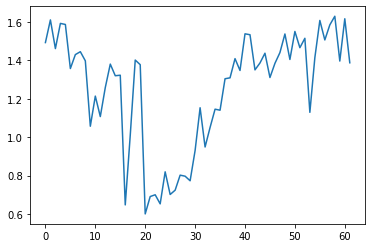

In [21]:
import matplotlib.pyplot as plt
plt.plot(df[df['target_full_ltv_day30'] > 0].groupby('install_date')['target_full_ltv_day30'].mean().values)

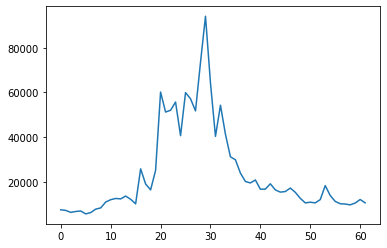

In [20]:
plt.plot(df.groupby('install_date')['target_full_ltv_day30'].count().values)

In [39]:
df_test = df[['media_source', 'install_date', 'country_code', 'platform', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']].copy()

In [40]:
df_test['platform_ios'] = np.zeros(df_test.shape[0])
df_test['platform_android'] = np.zeros(df_test.shape[0])

for i in range(df_test.shape[0]):
  if df_test.platform.iloc[i] == 'ios':
    df_test.at[i, 'platform_ios'] = 1
  else:
    df_test.at[i, 'platform_android'] = 1

In [41]:
df_test['source_4'] = np.zeros(df_test.shape[0])
df_test['source_17'] = np.zeros(df_test.shape[0])
df_test['source_23'] = np.zeros(df_test.shape[0])
df_test['source_2'] = np.zeros(df_test.shape[0])
df_test['source_10'] = np.zeros(df_test.shape[0])
df_test['source_12'] = np.zeros(df_test.shape[0])
df_test['source_1'] = np.zeros(df_test.shape[0])
df_test['source_6'] = np.zeros(df_test.shape[0])
df_test['source_19'] = np.zeros(df_test.shape[0])
df_test['source_5'] = np.zeros(df_test.shape[0])
df_test['source_9'] = np.zeros(df_test.shape[0])
df_test['source_18'] = np.zeros(df_test.shape[0])
df_test['source_16'] = np.zeros(df_test.shape[0])
df_test['source_14'] = np.zeros(df_test.shape[0])


for i in range(df_test.shape[0]):
  if df_test.media_source.iloc[i] == 'SOURCE_4':
    df_test.at[i, 'source_4'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_17':
    df_test.at[i, 'source_17'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_23':
    df_test.at[i, 'source_23'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_2':
    df_test.at[i, 'source_2'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_10':
    df_test.at[i, 'source_10'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_12':
    df_test.at[i, 'source_12'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_1':
    df_test.at[i, 'source_1'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_6':
    df_test.at[i, 'source_6'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_19':
    df_test.at[i, 'source_19'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_5':
    df_test.at[i, 'source_5'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_9':
    df_test.at[i, 'source_9'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_18':
    df_test.at[i, 'source_18'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_16':
    df_test.at[i, 'source_16'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_14':
    df_test.at[i, 'source_14'] = 1
  


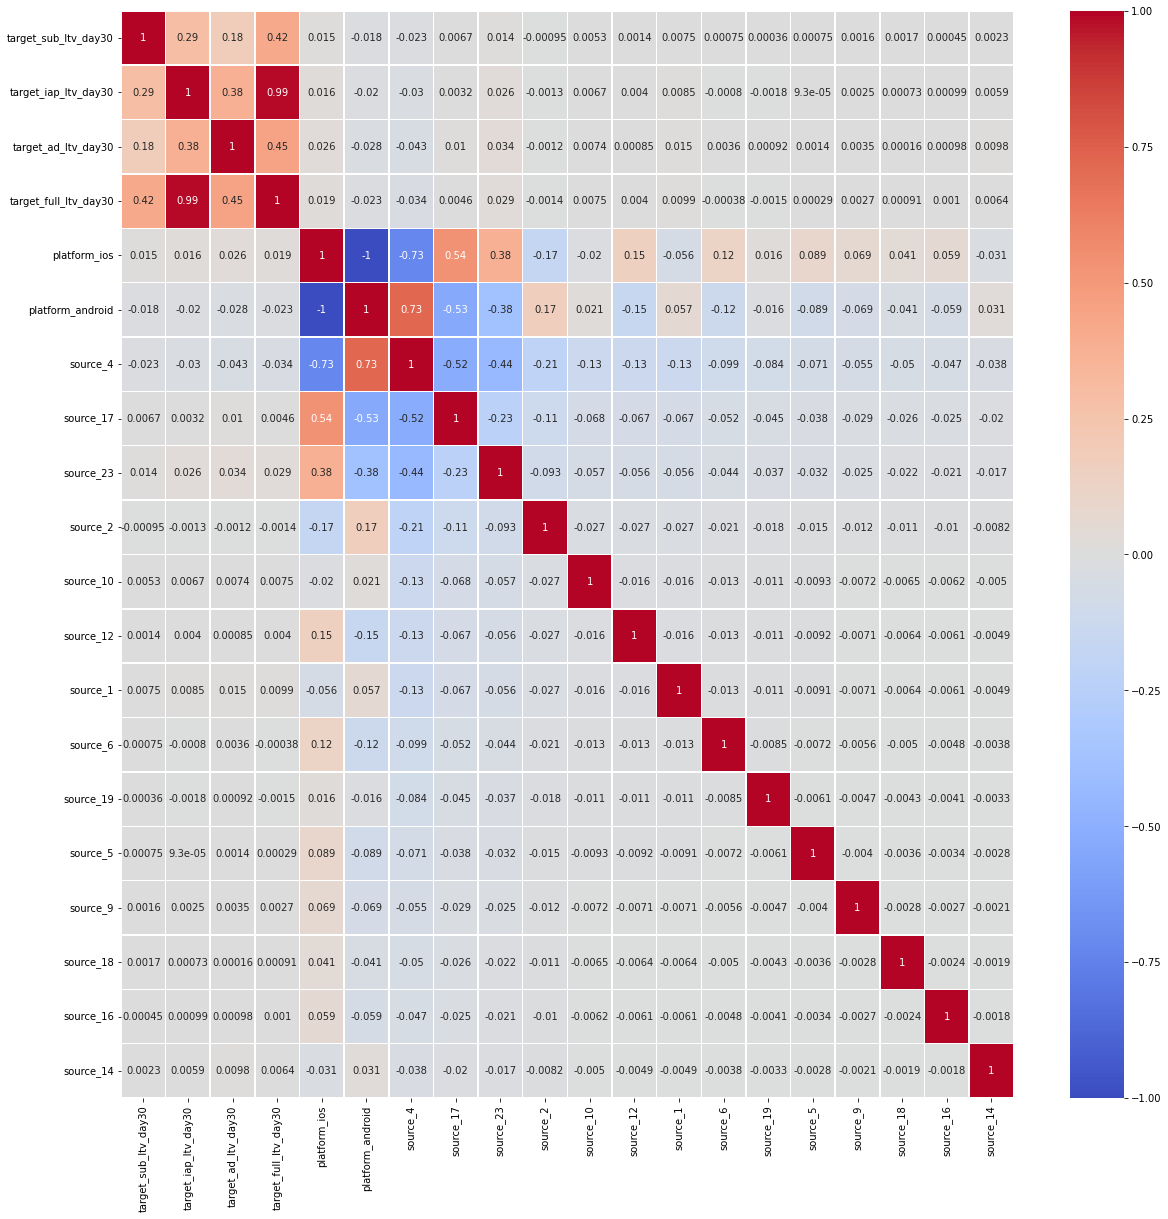

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_test.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5, ax=ax)

Як ми бачимо, ніякої кореляції між цими категоріальними змінними та нашими таргетами немає. Спробуємо Подивитись є кореляція між таргетом та топовими сорсами разом.

In [43]:
df_test['top_sources'] = np.zeros(df_test.shape[0])

for i in range(df_test.shape[0]):
  if df_test.media_source.iloc[i] == 'SOURCE_4':
    df_test.at[i, 'top_sources'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_17':
    df_test.at[i, 'top_sources'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_23':
    df_test.at[i, 'top_sources'] = 1
  elif df_test.media_source.iloc[i] == 'SOURCE_2':
     df_test.at[i, 'top_sources'] = 1


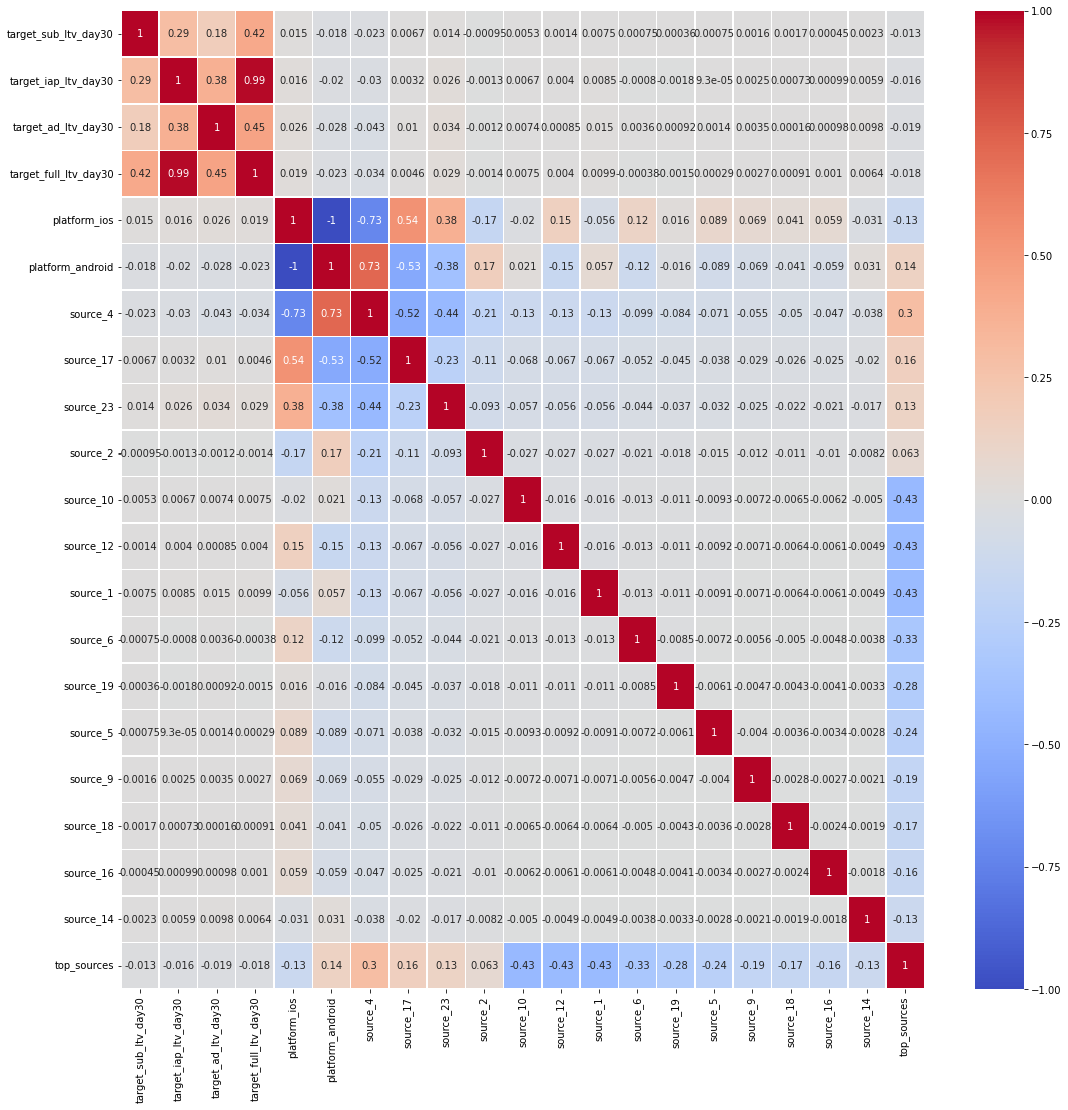

In [44]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_test.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5, ax=ax)

Все ще не бачимо ніякої кореляції. Переходимо до дослідження країн.

In [45]:
df.groupby(['country_code'], as_index=False)['target_full_ltv_day30'].count().sort_values('target_full_ltv_day30', ascending=False)

country_code  target_full_ltv_day30
48   COUNTRY_141                 387032
35    COUNTRY_13                 260160
63   COUNTRY_155                 152775
11   COUNTRY_108                 114651
153   COUNTRY_35                 111002
..           ...                    ...
68    COUNTRY_16                      1
155   COUNTRY_37                      1
33   COUNTRY_128                      1
2     COUNTRY_10                      1
112    COUNTRY_2                      1

[224 rows x 2 columns]

In [46]:
df_test = df[['media_source', 'install_date', 'country_code', 'platform', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']].copy()

In [47]:
df_test['country_141'] = np.zeros(df_test.shape[0])
df_test['country_13'] = np.zeros(df_test.shape[0])
df_test['country_155'] = np.zeros(df_test.shape[0])
df_test['country_108'] = np.zeros(df_test.shape[0])
df_test['country_35'] = np.zeros(df_test.shape[0])
df_test['country_137'] = np.zeros(df_test.shape[0])
df_test['country_72'] = np.zeros(df_test.shape[0])
df_test['country_38'] = np.zeros(df_test.shape[0])
df_test['country_208'] = np.zeros(df_test.shape[0])
df_test['country_189'] = np.zeros(df_test.shape[0])



for i in range(df_test.shape[0]):
  if df_test.country_code.iloc[i] == 'COUNTRY_141':
    df_test.at[i, 'country_141'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_12':
    df_test.at[i, 'country_13'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_155':
    df_test.at[i, 'country_155'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_108':
    df_test.at[i, 'country_108'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_35':
    df_test.at[i, 'country_35'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_137':
    df_test.at[i, 'country_137'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_72':
    df_test.at[i, 'country_72'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_38':
    df_test.at[i, 'country_38'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_208':
    df_test.at[i, 'country_208'] = 1
  elif df_test.country_code.iloc[i] == 'COUNTRY_189':
    df_test.at[i, 'country_189'] = 1

  

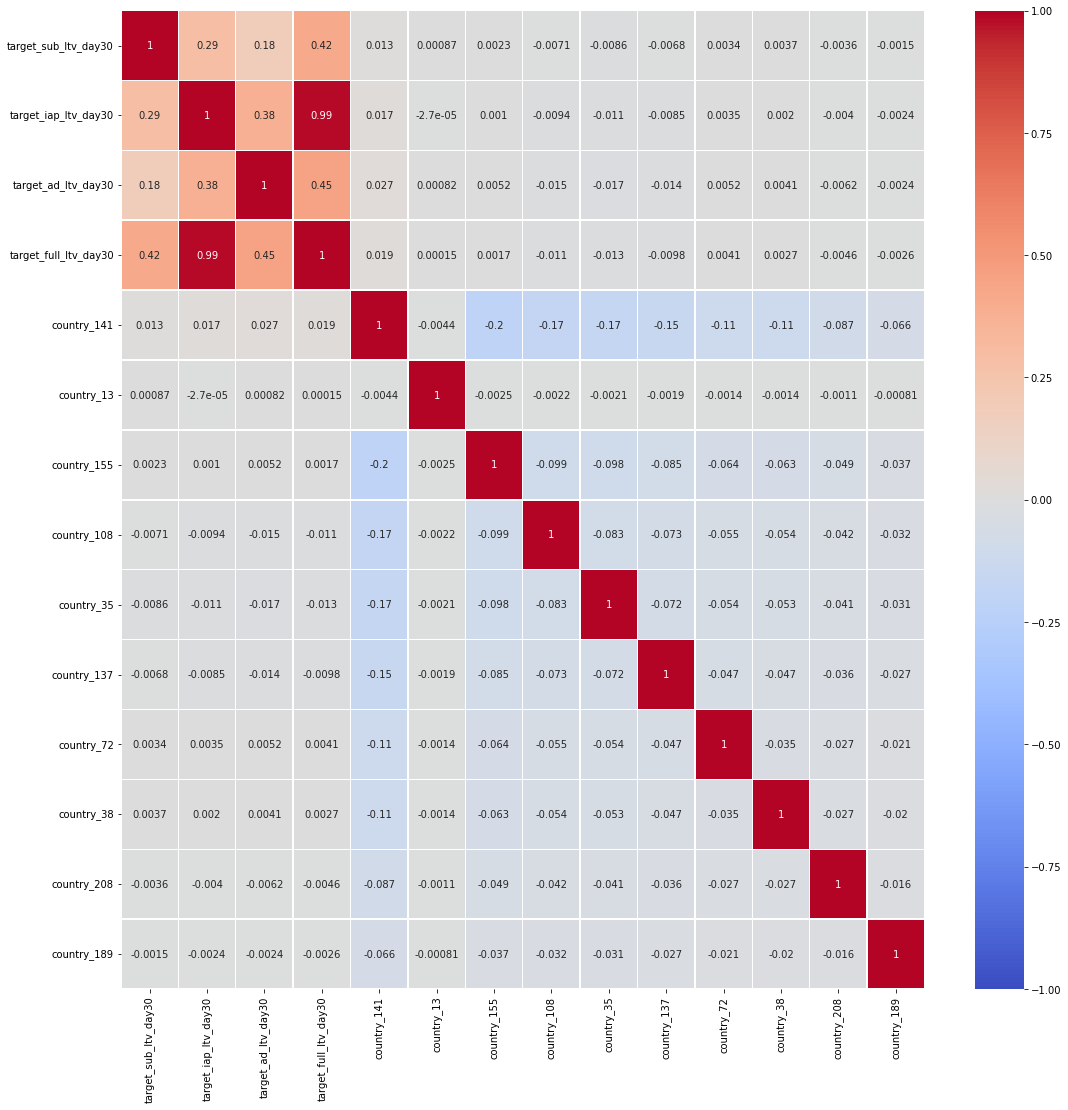

In [48]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_test.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5, ax=ax)

Топ країни за к-тю даних нічого нам не дали. Спробуємо дослідити дати


In [49]:
df_test = df[['media_source', 'install_date', 'country_code', 'platform', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']].copy()

In [50]:
df_test['date_new_year'] = np.zeros(df_test.shape[0])
df_test['date_christmas'] = np.zeros(df_test.shape[0])
df_test['date_holliday'] = np.zeros(df_test.shape[0])
df_test['date_other'] = np.zeros(df_test.shape[0])


for i in range(df_test.shape[0]):
  if df_test.install_date.iloc[i] == '2021-12-29':
    df_test.at[i, 'date_new_year'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-30':
    df_test.at[i, 'date_new_year'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-31':
    df_test.at[i, 'date_new_year'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-01-01':
    df_test.at[i, 'date_new_year'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-01-02':
    df_test.at[i, 'date_new_year'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-28':
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-27':
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-26':
    df_test.at[i, 'date_christmas'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-25':
    df_test.at[i, 'date_christmas'] = 1
    df_test.at[i, 'date_holliday'] = 1
  elif df_test.install_date.iloc[i] == '2021-12-24':
    df_test.at[i, 'date_christmas'] = 1
    df_test.at[i, 'date_holliday'] = 1
  else:
    df_test.at[i, 'date_other'] = 1

  

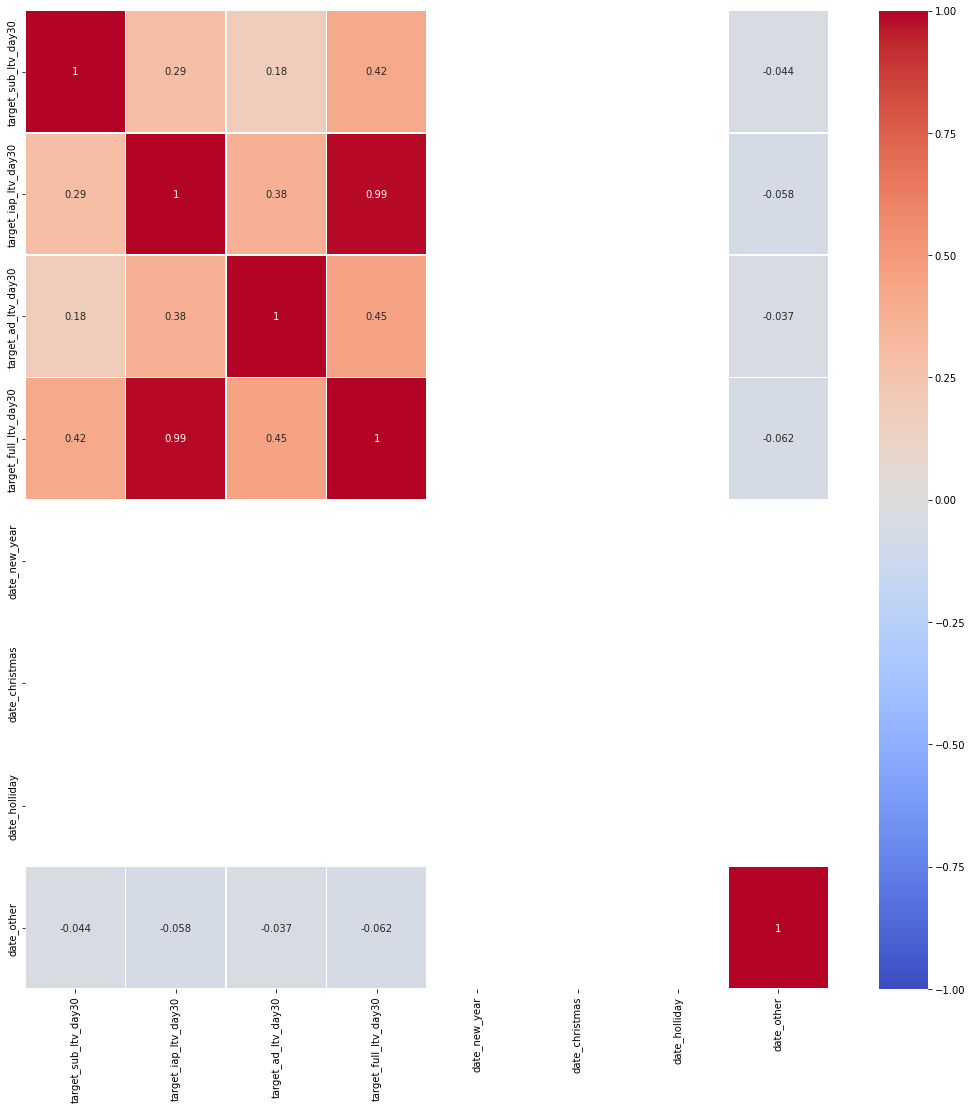

In [51]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_test.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', linewidths=.5, ax=ax)

Якщо дивитись розподіл по датах за кількістю даних, то бачимо, що найбільше встановленнь було у період Нового року та Католицького Різдва. Проте дати також не мають поитивних кореляцій.

# Було вирішено не додавати категоріальні фічі, так як вони мають низьку лінійну залежність з таргет фічами. Проте цілком можливо, що є нелінійні залежності, ми проводили деякі експерименти, але вони були неуспішні, тому моделі навчені вище є остаточними. 